In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import src.preprocess as prep
import src.eda as eda

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Set plot sizes
SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26
BIGGEST_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

# Load Data

In [4]:
path_to_dir = 'data'

df = prep.merge_csv_mult_dir(path_to_dir)

	Non-zip folders/files found in data: ['links_1']


In [5]:
print('Shape:', df.shape)
df.head()

Shape: (333032, 11)


,review_id,url,hotel_name,review_date,review_body,user_location,user_name,helpful_vote,rating,csv,folder
0,751342159,https://www.tripadvisor.com/Hotel_Review-g6076...,"Le Meridien New York, Central Park","March 18, 2020",We stayed a total of 4 nights after a terrible...,NaN,cmarroq,0,5.0,Le_Meridien_New_York_Central_Park-New_York_Cit...,links_1
1,751067370,https://www.tripadvisor.com/Hotel_Review-g6076...,"Le Meridien New York, Central Park","March 16, 2020",Very nice hotel indeed! Beautiful NYC view.Hot...,"Istanbul, Turkey","Eyup A</div><div class=""userLoc""><strong>Istan...",0,5.0,Le_Meridien_New_York_Central_Park-New_York_Cit...,links_1
2,750721023,https://www.tripadvisor.com/Hotel_Review-g6076...,"Le Meridien New York, Central Park","March 13, 2020","While the rooms are nice, cozy and in line wit...",NaN,I2522OWtoml,0,5.0,Le_Meridien_New_York_Central_Park-New_York_Cit...,links_1
3,750268844,https://www.tripadvisor.com/Hotel_Review-g6076...,"Le Meridien New York, Central Park","March 10, 2020",We recently celebrated my fiancé’s birthday at...,NaN,Donttechno,0,5.0,Le_Meridien_New_York_Central_Park-New_York_Cit...,links_1
4,750043116,https://www.tripadvisor.com/Hotel_Review-g6076...,"Le Meridien New York, Central Park","March 9, 2020","I love the hotel, but what makes it a true won...","Boston, Massachusetts","thg123</div><div class=""userLoc""><strong>Bosto...",4,5.0,Le_Meridien_New_York_Central_Park-New_York_Cit...,links_1


In [6]:
eda.get_nulls(df)

,Total,Percent,Type
user_location,54216,0.162795,object
folder,0,0.000000,object
csv,0,0.000000,object
rating,0,0.000000,float64
helpful_vote,0,0.000000,int64
user_name,0,0.000000,object
review_body,0,0.000000,object
review_date,0,0.000000,object
hotel_name,0,0.000000,object
url,0,0.000000,object


In [7]:
df = prep.clean_and_prep(df)

print('Shape:', df.shape)
df.head()

Shape: (333032, 16)


,review_id,url,hotel_name,review_date,review_body,user_location,user_name,helpful_vote,rating,csv,folder,city,user_name_clean,polarity,sentiment_int,sentiment
0,751342159,https://www.tripadvisor.com/Hotel_Review-g6076...,"Le Meridien New York, Central Park","March 18, 2020",We stayed a total of 4 nights after a terrible...,n/a,cmarroq,0,5.0,Le_Meridien_New_York_Central_Park-New_York_Cit...,links_1,New_York_City_New_York,cmarroq,1.0,2,positive
1,751067370,https://www.tripadvisor.com/Hotel_Review-g6076...,"Le Meridien New York, Central Park","March 16, 2020",Very nice hotel indeed! Beautiful NYC view.Hot...,"Istanbul, Turkey","Eyup A</div><div class=""userLoc""><strong>Istan...",0,5.0,Le_Meridien_New_York_Central_Park-New_York_Cit...,links_1,New_York_City_New_York,Eyup A,1.0,2,positive
2,750721023,https://www.tripadvisor.com/Hotel_Review-g6076...,"Le Meridien New York, Central Park","March 13, 2020","While the rooms are nice, cozy and in line wit...",n/a,I2522OWtoml,0,5.0,Le_Meridien_New_York_Central_Park-New_York_Cit...,links_1,New_York_City_New_York,I2522OWtoml,1.0,2,positive
3,750268844,https://www.tripadvisor.com/Hotel_Review-g6076...,"Le Meridien New York, Central Park","March 10, 2020",We recently celebrated my fiancé’s birthday at...,n/a,Donttechno,0,5.0,Le_Meridien_New_York_Central_Park-New_York_Cit...,links_1,New_York_City_New_York,Donttechno,1.0,2,positive
4,750043116,https://www.tripadvisor.com/Hotel_Review-g6076...,"Le Meridien New York, Central Park","March 9, 2020","I love the hotel, but what makes it a true won...","Boston, Massachusetts","thg123</div><div class=""userLoc""><strong>Bosto...",4,5.0,Le_Meridien_New_York_Central_Park-New_York_Cit...,links_1,New_York_City_New_York,thg123,1.0,2,positive


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333032 entries, 0 to 333031
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   review_id        333032 non-null  int64  
 1   url              333032 non-null  object 
 2   hotel_name       333032 non-null  object 
 3   review_date      333032 non-null  object 
 4   review_body      333032 non-null  object 
 5   user_location    333032 non-null  object 
 6   user_name        333032 non-null  object 
 7   helpful_vote     333032 non-null  int64  
 8   rating           333032 non-null  float64
 9   csv              333032 non-null  object 
 10  folder           333032 non-null  object 
 11  city             333032 non-null  object 
 12  user_name_clean  333032 non-null  object 
 13  polarity         333032 non-null  float64
 14  sentiment_int    333032 non-null  int64  
 15  sentiment        333032 non-null  object 
dtypes: float64(2), int64(3), object(11)
me

# EDA

In [9]:
eda.print_unique_ct(df)

Count of Unique Values per Column:

review_id: 333028
url: 66685
hotel_name: 263
review_date: 5647
review_body: 332985
user_location: 35217
user_name: 293810
helpful_vote: 901
rating: 5
csv: 263
folder: 1
city: 41
user_name_clean: 261294
polarity: 3
sentiment_int: 3
sentiment: 3


In [10]:
df.describe()

,review_id,helpful_vote,rating,polarity,sentiment_int
count,3.330320e+05,333032.000000,333032.000000,333032.000000,333032.000000
mean,4.206621e+08,27.875435,4.120676,0.841251,1.682502
std,1.954686e+08,269.032950,1.096938,0.320471,0.640943
min,7.051910e+05,0.000000,1.000000,0.000000,0.000000
25%,2.499110e+08,1.000000,4.000000,1.000000,2.000000
50%,4.313429e+08,7.000000,4.000000,1.000000,2.000000
75%,5.879052e+08,26.000000,5.000000,1.000000,2.000000
max,7.555458e+08,115958.000000,5.000000,1.000000,2.000000


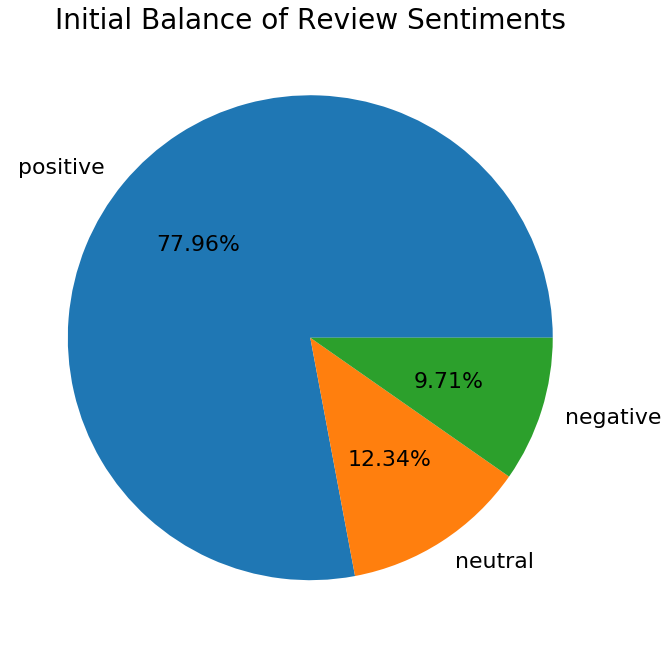

In [11]:
# Plot pie - Sentiments
fig, ax = plt.subplots(figsize=(10,10))
eda.plot_pie(df['sentiment'], fig, ax)
ax.set_title('Initial Balance of Review Sentiments', size=BIGGEST_SIZE)
ax.set_ylabel('')
fig.savefig('imgs/pie_sentiments_initial')

Total Number of Ratings:  333032


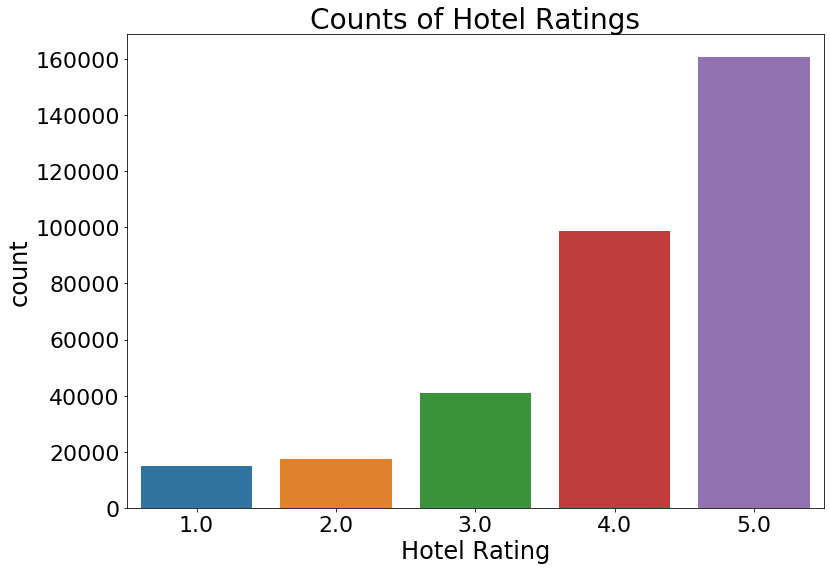

In [12]:
# Plot counts - Ratings
print('Total Number of Ratings: ', df.shape[0])

fig, ax = plt.subplots(figsize=(12,8))
eda.plot_counts(df, 'rating', fig, ax)
ax.set_title('Counts of Hotel Ratings', size=BIGGEST_SIZE)
ax.set_xlabel('Hotel Rating')
fig.savefig('imgs/countplot_ratings_full')

# Train-Test-Val Split

In [13]:
target = 'sentiment'
features = ['review_body']
X_train, X_val, X_test, y_train, y_val, y_test, \
    indices_train, indices_val, indices_test = prep.train_test_val_split(df, target, features)

	Train: 213140, Val: 53285, Test: 66607


In [14]:
indices_train.shape, indices_val.shape, indices_test.shape

((213140,), (53285,), (66607,))

## Handling class imbalance by under-sampling train data

In [15]:
train_df_us = prep.undersample_train(df, target, indices_train, y_train)

	Majority Class: positive, Middle Class: neutral, Minority Class: negative
		Number positive in train: 166155
		Number neutral in train: 26299
		Number negative in train: 20686
	Final undersampled train size: 62058


Total Number of Ratings:  62058


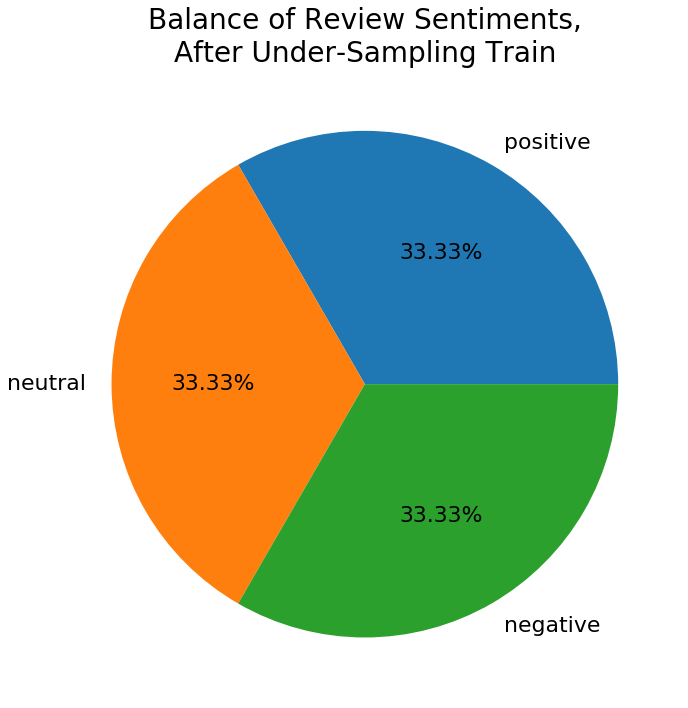

In [16]:
# Plot pie - Classes after undersampling
print('Total Number of Ratings: ', train_df_us.shape[0])

fig, ax = plt.subplots(figsize=(10,10))
eda.plot_pie(train_df_us[target], fig, ax)
ax.set_title('Balance of Review Sentiments,\nAfter Under-Sampling Train', size=BIGGEST_SIZE)
ax.set_ylabel('')
fig.savefig('imgs/pie_sentiments_train_undersample')

# Modeling with TF-IDF

In [17]:
# ! python src/preprocess.py data

```
Processing files in data...
	Non-zip folders/files found in data: ['links_1']

Splitting data into train/val/test...
	Train: 213140, Val: 53285, Test: 66607
	Majority Class: positive, Middle Class: neutral, Minority Class: negative
		Number positive in train: 166155
		Number neutral in train: 26299
		Number negative in train: 20686
	Final undersampled train size: 62058
    
Getting bag of words for train data...

Starting modeling...

	Fitting LogisticRegression...
                Scores: {'fit_time': array([14.73221493, 14.67445898, 14.61940336, 14.66072369, 14.82588744]), 'score_time': array([1.42016864, 1.41654634, 1.41894245, 1.41845775, 1.41838765]), 'test_accuracy': array([0.75580084, 0.75733161, 0.7546729 , 0.75707034, 0.75183305]), 'train_accuracy': array([0.81660154, 0.81801152, 0.81873666, 0.81743106, 0.81745121])}
                Average train accuracy: 0.8176463969614115
                Average test accuracy: 0.7553417483627481
        
        
    Fitting MultinomialNB...
                Scores: {'fit_time': array([10.13023186, 10.1286757 , 10.13355589, 10.13215995, 10.13620377]), 'score_time': array([1.41610551, 1.41577578, 1.4157331 , 1.41798496, 1.41525722]), 'test_accuracy': array([0.7296165 , 0.7340477 , 0.72655495, 0.73168963, 0.72959471]), 'train_accuracy': array([0.7589131 , 0.75846997, 0.75959795, 0.75797128, 0.75811227])}
                Average train accuracy: 0.7586129151047422
                Average test accuracy: 0.7303006974596283


        Fitting RandomForestClassifier...
                Scores: {'fit_time': array([135.37750936, 135.43342757, 136.33951545, 135.32857227,
       135.47986341]), 'score_time': array([1.94026279, 1.93801475, 1.94030833, 1.94585085, 1.93872213]), 'test_accuracy': array([0.70488237, 0.70995811, 0.7087496 , 0.70904842, 0.69680122]), 'train_accuracy': array([1., 1., 1., 1., 1.])}
                Average train accuracy: 1.0
                Average test accuracy: 0.705887944725258


        Fitting GradientBoostingClassifier...
                Scores: {'fit_time': array([263.72342896, 266.55406952, 263.8704145 , 265.59878659,
       265.58436465]), 'score_time': array([1.4826808 , 1.48225331, 1.47889447, 1.48168659, 1.48074532]), 'test_accuracy': array([0.69416694, 0.69972607, 0.69344183, 0.69800983, 0.6876964 ]), 'train_accuracy': array([0.71729847, 0.71687548, 0.71788261, 0.71780772, 0.71849256])}
                Average train accuracy: 0.7176713680849213
                Average test accuracy: 0.6946082131200184


        Fitting XGBClassifier...
                Scores: {'fit_time': array([21.48981547, 21.50380468, 21.49269342, 21.56712437, 21.57016969]), 'score_time': array([1.61389542, 1.61442304, 1.61841702, 1.60971189, 1.61087203]), 'test_accuracy': array([0.72824686, 0.73324202, 0.73001934, 0.73249537, 0.72129562]), 'train_accuracy': array([0.85400637, 0.8536438 , 0.85275752, 0.85267992, 0.85541926])}
                Average train accuracy: 0.8537013733264303
                Average test accuracy: 0.7290598419431495
```

# Recommender System

## Check Data Sparsity

In [18]:
train_df_us.head()

,review_id,url,hotel_name,review_date,review_body,user_location,user_name,helpful_vote,rating,csv,folder,city,user_name_clean,polarity,sentiment_int,sentiment
256945,523601739,https://www.tripadvisor.com/Hotel_Review-g6076...,The Roosevelt Hotel,"September 11, 2017",I went with a prepaid bono and they charged me...,"Grand Rapids, Michigan","_ealonsom69</div><div class=""userLoc""><strong>...",0,1.0,The_Roosevelt_Hotel-New_York_City_New_York__en...,links_1,New_York_City_New_York,_ealonsom69,0.0,0,negative
23889,498055753,https://www.tripadvisor.com/Hotel_Review-g6098...,Castle Waikiki Grand Hotel,"July 2, 2017",So typical to get great web deal and find that...,"Honolulu, Hawaii","danderhi</div><div class=""userLoc""><strong>Hon...",1,2.0,Castle_Waikiki_Grand_Hotel-Honolulu_Oahu_Hawai...,links_1,Honolulu_Oahu_Hawaii,danderhi,0.0,0,negative
328097,170783116,https://www.tripadvisor.com/Hotel_Review-g1413...,Keio Plaza Hotel Tokyo,"August 4, 2013","The Keio Plaza is in a very good location, wit...","Hong Kong, China","LaPortuguesa</div><div class=""userLoc""><strong...",40,2.0,Keio_Plaza_Hotel_Tokyo-Nishishinjuku_Shinjuku_...,links_1,Nishishinjuku_Shinjuku_Tokyo_Tokyo_Prefecture_...,LaPortuguesa,0.0,0,negative
43122,646140774,https://www.tripadvisor.com/Hotel_Review-g6076...,Four Points by Sheraton New York Downtown,"January 15, 2019",My family and I stayed at FPBS New York Downto...,"Melbourne, Australia","jingga18</div><div class=""userLoc""><strong>Mel...",74,1.0,Four_Points_by_Sheraton_New_York_Downtown-New_...,links_1,New_York_City_New_York,jingga18,0.0,0,negative
32696,508039155,https://www.tripadvisor.com/Hotel_Review-g6098...,Stay Hotel Waikiki,"August 2, 2017",I don't know where to start. As soon as we arr...,"Sydney, Australia","AshyBiber</div><div class=""userLoc""><strong>Sy...",5,1.0,Stay_Hotel_Waikiki-Honolulu_Oahu_Hawaii__en.csv,links_1,Honolulu_Oahu_Hawaii,AshyBiber,0.0,0,negative
